<a href="https://colab.research.google.com/github/claudiaesnarrizaga/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr%C3%A1ctica_1_Dise%C3%B1o%2C_Entrenamiento_y_Test_de_un_Sistema_de_Redes_de_Neuronas_Artificiales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 - Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas.
###Grupo B03
Integrantes: Celia Díaz, Jaime Martínez, Claudia Esnarrizaga


##**Enunciado**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de **reconocer** y **clasificar imágenes de ropa** en sus diferentes **tipologías**. Este modelo será **definido**, **configurado**, **entrenado**, **evaluado** y **mejorado** para posteriormente usarlo para hacer **predicciones**.
Para ello, tendréis que crear un modelo en **Keras** aplicando de una tirada todos los pasos al conjunto de datos **Fashion-MNIST**, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de cifras.
Fashion_MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70k imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).
Se usan 60k imágenes para entrenar la red y 10k imágenes para evaluar la **precisión** con la que la red aprende a clasificar las imágenes.

##**Cuestiones a tener en cuenta**

1. Importar todas las librerías
requeridas
2. Asegurar que estamos ejecutando la versión 2.0.0 (o superior) de TensorFlow
3. Cargar datos de entrenamiento y de Test a partir de *keras.datasets.fashion_mnist*
4. Analizar si los datos tienen la forma esperada
5. Analizar el uso de la función de keras *keras.layers.Flatten()*




In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x # Metasentencia: asegurarme de que estoy usando la versión por encima de la versión 2
import tensorflow as tf # tensorflow (librería): matrices, tensores
from tensorflow import keras # Usamos keras metido dentro de tensorflow

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# 2._ VERSIÓN TENSORFLOW >= 2.0.0
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__) # Vemos qué versión estamos utilizando

GPU Available: []
2.13.0


In [ ]:
# 3._ CARGAMOS EL CONJUNTO DE DATOS FASHION-MINIST EN KERAS
from keras.datasets import fashion_mnist # De todos los conjuntos de datos impórtame mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Llama a una función, cargar datos

4422102/4422102 [==============================] - 0s 0us/step


Para comprobar la forma de los datos, imprimiremos una de las imágenes, elegida de forma aleatoria, y dependiendo del número que nos devuelva, sabremos qué prenda es gracias a la siguiente tabla:

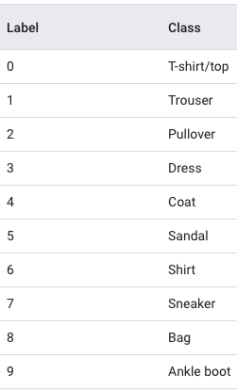

In [ ]:
# 4._ COMPROBAR FORMA DE LOS DATOS
print(train_images.shape) # train_images: variable donde se me han guardado las imágenes (60000 imágenes/matrices de 28x28)
# Vemos la matriz de la imagen número 2500 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[2500]))

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0  13   4   0   0   0  30   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 189 228 255 172 124 255 235 201  94   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  52 246 244 227 217 233 235 229 233 239 255  99   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180 246 226 232 229 223 228 235 234 230 244 216   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 217 242 229 233 235 235 236 236 233 231 241 240   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 244 242 239 233 233 233 232 234 234 239 239 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227 230 215 250 233 233 233 236 246 220 227 239   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  14 249 178 120 255 227 240 241 227 255 108 148 255  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  62 255 136  65 255 231 219 215 23

In [ ]:
train_labels[2500] # Cogemos la etiqueta asociada a la imagen 2500
# La imagen corresponde con un vestido.

3

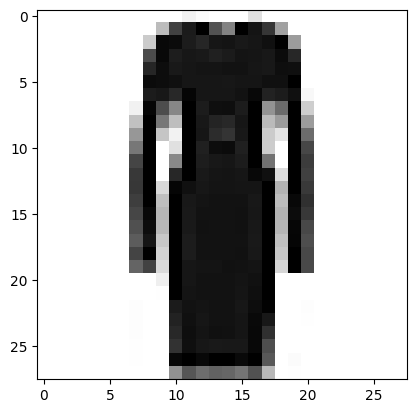

In [ ]:
# Veamos el elemento 2500 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[2500]
plt.imshow(digit, cmap=plt.cm.binary) # imshow: muéstrame imagen, le paso una matriz y
                                      # el mapeo de colores es cm.binary (número más bajo = blanco, número más alto = negro)
plt.show()

La función *keras.layers.Flatten()* se utiliza para aplanar una capa de datos en una sola dimensión. En el contexto de un modelo de red neuronal, se utiliza para transformar datos bidimensionales (como imágenes) en una forma unidimensional antes de pasarlos a capas densamente conectadas. En nuestro código, podríamos aplicarlo de la siguiente manera:

In [ ]:
# 5._ ANALIZAR FUNCIÓN keras.layers.Flatten()
from keras.layers import Flatten, Dense
# Añadimos una capa Flatten después de cargar los datos
model = keras.Sequential([Flatten(input_shape = (28, 28))])

Si agregamos una capa Flatten después de cargar los datos nos transformará las imágenes de 28x28 píxeles en un vector unidimensional de 784 elementos antes de pasarlos a las capas densas de la red neuronal. Esto es necesario porque las capas densas requieren entradas unidimensionales. No nos va a cambiar la forma en que cargamos o mostramos las imágenes, pero va a ser una parte esencial de la definición de nuestro modelo de red neuronal si planeamos usar capas densamente conectadas después de aplanar los datos.

##**Cuestiones para implementar y responder**

####**1._** Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida 'categorical_crossentropy', métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados:
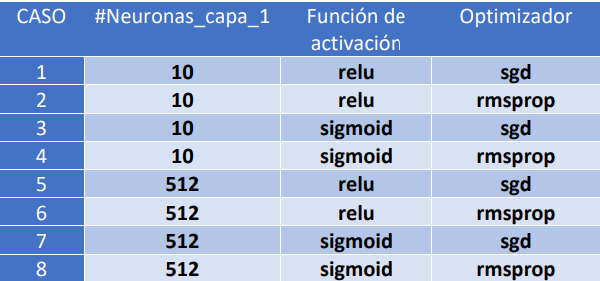

In [ ]:
from keras import models
from keras import layers
# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()

Aprovechando que hemos investigado sobre la función Flatten, incluiremos una línea de código implementándola. La capa **Flatten** no utiliza función de activación, ya que su único propósito es transformar la entrada tridimensional en una entrada unidimensional. Su función es puramente estructural y no realiza ningún cambio ni cálculo de activación.

In [ ]:
network.add(layers.Flatten(input_shape=(28, 28)))

A continuación programaremos los distintos casos:

Hemos creado una función para entrenar nuestra red y así tener un código un poco más limpio:

In [ ]:
def train_model (neurons, activation, optimizer, epochs):
    network = models.Sequential()
    network.add(Flatten(input_shape=(28, 28)))
    network.add(Dense(neurons, activation=activation))
    network.add(Dense(10, activation='softmax'))
    network.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = network.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history

In [ ]:
# Modelos y configuraciones
configs = [
    (10, 'relu', 'sgd', 5),        # Modelo 1
    (10, 'relu', 'rmsprop', 5),    # Modelo 2
    (10, 'sigmoid', 'sgd', 5),     # Modelo 3
    (10, 'sigmoid', 'rmsprop', 5), # Modelo 4
    (512, 'relu', 'sgd', 5),       # Modelo 5
    (512, 'relu', 'rmsprop', 5),   # Modelo 6
    (512, 'sigmoid', 'sgd', 5),    # Modelo 7
    (512, 'sigmoid', 'rmsprop', 5) # Modelo 8
]

modelos = []
# Entrenar y evaluar los modelos
for i, caso in enumerate(configs):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: {}".format(i + 1, neurons, activation, optimizer))
    history = train_model(neurons, activation, optimizer, epochs)
    print("Resultado en épocas de entrenamiento:")
    print("Época final - Precisión de entrenamiento: {},".format(history.history['accuracy'][-1]), "Precisión de prueba: {}".format(history.history['val_accuracy'][-1]))
    print("="*50)
    modelos.append(network)



Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: sgd
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.5462 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Resultado en épocas de entrenamiento:
Época final - Precisión de entrenamiento: 0.0980166643857956, Precisión de prueba: 0.10000000149011612
Entrenando Modelo 2 - Neuronas en Capa 1: 10, Funci

####**2._** Explicar la salida de la llamada *model.summary()* de cada uno de los 8 casos

In [ ]:
def model_summary (neurons, activation, optimizer, epochs):
    model = models.Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model.summary()

for i, caso in enumerate(configs):
    print("Resumen de modelo {}".format(i+1))
    neurons, activation, optimizer, epochs = caso
    model_summary (neurons, activation, optimizer, epochs)
    print("="*50)

Resumen de modelo 1
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Resumen de modelo 2
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                      

Las interpretaciones que hemos sacado del resumen de cada modelo utilizando `model.summary()` son las siguientes:

1. **Modelo 1**:
   - Nombre del modelo: "sequential_57"
   - Arquitectura: Es un modelo secuencial que consta de dos capas densas (dense_75 y dense_76).
   - `flatten_53`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_75`: Capa densa con 10 neuronas de salida.
   - `dense_76`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 7960 (31.09 KB).
   - Parámetros entrenables: 7960 (31.09 KB).
   - Parámetros no entrenables: 0 (0.00 Byte).

2. **Modelo 2**:
   - Nombre del modelo: "sequential_58"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_77 y dense_78).
   - `flatten_54`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_77`: Capa densa con 10 neuronas de salida.
   - `dense_78`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 7960 (31.09 KB).
   - Parámetros entrenables: 7960 (31.09 KB).
   - Parámetros no entrenables: 0 (0.00 Byte).

3. **Modelo 3**:
   - Nombre del modelo: "sequential_59"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_79 y dense_80).
   - `flatten_55`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_79`: Capa densa con 10 neuronas de salida.
   - `dense_80`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 7960 (31.09 KB).
   - Parámetros entrenables: 7960 (31.09 KB).
   - Parámetros no entrenables: 0 (0.00 Byte).

4. **Modelo 4**:
   - Nombre del modelo: "sequential_60"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_81 y dense_82).
   - `flatten_56`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_81`: Capa densa con 10 neuronas de salida.
   - `dense_82`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 7960 (31.09 KB).
   - Parámetros entrenables: 7960 (31.09 KB).
   - Parámetros no entrenables: 0 (0.00 Byte).

5. **Modelo 5**:
   - Nombre del modelo: "sequential_61"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_83 y dense_84).
   - `flatten_57`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_83`: Capa densa con 512 neuronas de salida.
   - `dense_84`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 407050 (1.55 MB).
   - Parámetros entrenables: 407050 (1.55 MB).
   - Parámetros no entrenables: 0 (0.00 Byte).

6. **Modelo 6**:
   - Nombre del modelo: "sequential_62"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_85 y dense_86).
   - `flatten_58`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_85`: Capa densa con 512 neuronas de salida.
   - `dense_86`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 407050 (1.55 MB).
   - Parámetros entrenables: 407050 (1.55 MB).
   - Parámetros no entrenables: 0 (0.00 Byte).

7. **Modelo 7**:
   - Nombre del modelo: "sequential_63"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_87 y dense_88).
   - `flatten_59`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_87`: Capa densa con 512 neuronas de salida.
   - `dense_88`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 407050 (1.55 MB).
   - Parámetros entrenables: 407050 (1.55 MB).
   - Parámetros no entrenables: 0 (0.00 Byte).

8. **Modelo 8**:
   - Nombre del modelo: "sequential_64"
   - Arquitectura: Modelo secuencial con dos capas densas (dense_89 y dense_90).
   - `flatten_60`: Capa de aplanamiento que convierte una entrada bidimensional en una unidimensional (None, 784).
   - `dense_89`: Capa densa con 512 neuronas de salida.
   - `dense_90`: Capa densa con 10 neuronas de salida.
   - Total de parámetros: 407050 (1.55 MB).
   - Parámetros entrenables: 407050 (1.55 MB).
   - Parámetros no entrenables: 0 (0.00 Byte).

Podemos observar que cada modelo es un modelo secuencial con una capa de aplanamiento y dos capas densas. El método `model.summary()` devuelve información sobre la arquitectura de la red, incluyendo el nombre de las capas, la forma de salida de cada capa, el número de parámetros entrenables y no entrenables, y la cantidad total de parámetros en la red. También proporciona información sobre el tamaño en memoria de los parámetros entrenables.
Gracias a esta información, la única variación notable que hemos observado es total de parámetros y los parámetros entrenables:


*   7960 (31.09 KB) cuando tenemos 10 neuronas de salida
*   407050 (1.55 MB) cuando tenemos 512 neuronas de salida



####**3._** Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)


In [ ]:
configs2 = [
    (10, 'relu', 'rmsprop', 25),    # Modelo 2
    (512, 'sigmoid', 'sgd', 25),    # Modelo 7
]

# Entrenar y evaluar los modelos
for i, caso in enumerate(configs2):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: {}".format(i + 1, neurons, activation, optimizer))
    history = train_model(neurons, activation, optimizer, epochs)
    print("Resultado en épocas de entrenamiento:")
    print("Época final - Precisión de entrenamiento: {history.history['accuracy'][-1]}, Precisión de prueba: {history.history['val_accuracy'][-1]}")
    print("="*50)

Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: rmsprop
Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2278 - accuracy: 0.2716 - val_loss: 1.7697 - val_accuracy: 0.3287
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7754 - accuracy: 0.3429 - val_loss: 1.6636 - val_accuracy: 0.3797
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6757 - accuracy: 0.3998 - val_loss: 1.6827 - val_accuracy: 0.4655
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4756 - accuracy: 0.4915 - val_loss: 1.5949 - val_accuracy: 0.5313
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3913 - accuracy: 0.5130 - val_loss: 1.3570 - val_accuracy: 0.5126
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3547 - accuracy: 0.5287 - val_loss: 1.4959 - val_accuracy: 0.5326
Epoch 7/25
1875/1875 [==================

Vamos a analizar e interpretar los resultados de los dos entrenamientos de cada modelo, uno con 5 épocas y otro con 25 épocas:

**Modelo 2 Entrenado con 5 Épocas:**

En la primera época, el modelo tiene una pérdida (loss) de aproximadamente 2.4149 y una precisión (accuracy) de alrededor del 10% en el conjunto de entrenamiento. En el conjunto de validación, la pérdida es de alrededor de 2.3043 y la precisión es del 9.99%.
A lo largo de las 5 épocas, el modelo no muestra una mejora significativa en la precisión ni en la pérdida. La precisión se mantiene en alrededor del 10%, lo que indica que el modelo está teniendo dificultades para aprender y realizar predicciones útiles.

**Modelo 2 Entrenado con 25 Épocas:**

En la primera época, el modelo tiene una pérdida de aproximadamente 2.2419 y una precisión de alrededor del 25.09% en el conjunto de entrenamiento. En el conjunto de validación, la pérdida es de aproximadamente 1.8471 y la precisión es del 32.71%.
A lo largo de las 25 épocas, el modelo muestra una mejora en la precisión y la pérdida tanto en el conjunto de entrenamiento como en el conjunto de validación. Esto indica que el modelo está aprendiendo a medida que se entrena. Sin embargo, la precisión en el conjunto de validación parece estancarse después de alrededor de la época 6, lo que sugiere que el modelo podría estar sobreajustando los datos de entrenamiento.
La precisión en el conjunto de validación alcanza su punto máximo alrededor de la época 11 y luego disminuye ligeramente, lo que podría ser un signo de sobreajuste.



**Modelo 7 entrenado con 5 épocas:**

En la época 1, la pérdida (loss) en el conjunto de entrenamiento es de aproximadamente 0.7193, mientras que la precisión (accuracy) es de aproximadamente 0.7560. En el conjunto de validación, la pérdida es de aproximadamente 0.6408 y la precisión es de aproximadamente 0.7682.
A lo largo de las 5 épocas, la pérdida en el conjunto de entrenamiento disminuye gradualmente, y la precisión aumenta, lo que indica que el modelo está aprendiendo de los datos de entrenamiento.
En el conjunto de validación, la pérdida también disminuye durante las 5 épocas, y la precisión aumenta ligeramente, lo que sugiere que el modelo generaliza mejor a medida que avanza el entrenamiento.

**Modelo 7 entrenado con 25 épocas:**

En la época 1, la pérdida en el conjunto de entrenamiento es de aproximadamente 0.7126, y la precisión es de aproximadamente 0.7579. En el conjunto de validación, la pérdida es de aproximadamente 0.6283 y la precisión es de aproximadamente 0.7760.
A medida que avanzan las épocas, se observa una tendencia similar a la del modelo entrenado con 5 épocas. La pérdida en el conjunto de entrenamiento disminuye y la precisión aumenta gradualmente.
En el conjunto de validación, la pérdida también disminuye a lo largo de las épocas, y la precisión aumenta. Sin embargo, en comparación con el modelo entrenado con 5 épocas, este modelo parece tener una tendencia a alcanzar una precisión ligeramente más alta en el conjunto de validación.








En general, en ambos modelos, el modelo entrenado con 25 épocas parece tener un mejor rendimiento en términos de precisión en el conjunto de validación en comparación con el modelo entrenado con 5 épocas. Esto sugiere que el entrenamiento prolongado ha permitido al modelo aprender mejor los patrones en los datos de entrenamiento y generalizar mejor a datos no vistos en el conjunto de validación. Sin embargo, es importante tener en cuenta que un entrenamiento excesivamente largo puede llevar a un sobreajuste (overfitting), por lo que se debe tener cuidado al seleccionar el número adecuado de épocas para entrenar un modelo.

####**4._** Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba


In [ ]:
# Importa Sequential desde keras.models
from keras.models import Sequential

# Define y compila el modelo fuera del bucle
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(neurons, activation=activation))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_accuracies = []  # Almacenar las precisiones de los modelos

for i, caso in enumerate(configs):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: {}".format(i + 1, neurons, activation, optimizer))

    # No es necesario compilar nuevamente dentro de train_model
    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    model_accuracies.append(test_accuracy)

    print("Resultado en épocas de entrenamiento:")
    print("Precisión de entrenamiento en la última época: {:.4f}".format(history.history['accuracy'][-1]))
    print("Precisión de prueba: {:.4f}".format(test_accuracy))
    print("="*50)

# Comparar las precisiones de los modelos
best_model_index = model_accuracies.index(max(model_accuracies))
best_model_accuracy = max(model_accuracies)

print("El mejor modelo es el Modelo {} con una precisión en el conjunto de prueba de {:.2f}%".format(best_model_index + 1, best_model_accuracy*100))


Entrenando Modelo 1 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: sgd
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8022
Precisión de prueba: 0.7924
Entrenando Modelo 2 - Neuronas en Capa 1: 10, Función de Activación: relu, Optimizador: rmsprop
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8065
Precisión de prueba: 0.7895
Entrenando Modelo 3 - Neuronas en Capa 1: 10, Función de Activación: sigmoid, Optimizador: sgd
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8076
Precisión de prueba: 0.7841
Entrenando Modelo 4 - Neuronas en Capa 1: 10, Función de Activación: sigmoid, Optimizador: rmsprop
Resultado en épocas de entrenamiento:
Precisión de entrenamiento en la última época: 0.8051
Precisión de prueba: 0.7945
Entrenando Modelo 5 - Neuronas en Capa 1: 512, Función de Activación: relu, Optimizador: sgd
Resultado en épocas de entrenamiento:
Precisi

####**5._** Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (*test_images[5])


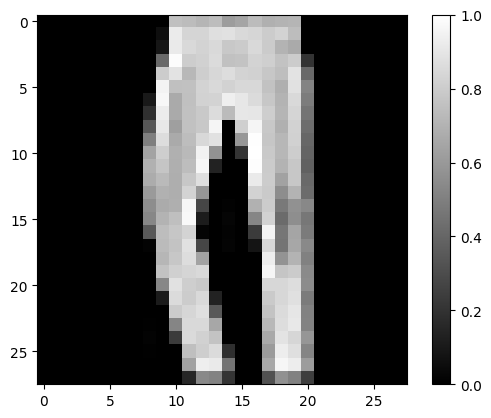

In [50]:
import matplotlib.pyplot as plt

# Supongamos que test_images[5] es una matriz bidimensional de 28x28 píxeles.

plt.figure()
plt.imshow(test_images[5].reshape(28, 28), cmap='gray')  # Asegúrate de que la forma sea (28, 28)
plt.colorbar()
plt.grid(False)
plt.show()


In [114]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

In [73]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(10, activation='sigmoid'))
model3.add(Dense(10, activation='softmax'))

model4 = Sequential()
model4.add(Flatten(input_shape=(28, 28)))
model4.add(Dense(10, activation='sigmoid'))
model4.add(Dense(10, activation='softmax'))

model5 = Sequential()
model5.add(Flatten(input_shape=(28, 28)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))

model6 = Sequential()
model6.add(Flatten(input_shape=(28, 28)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model7 = Sequential()
model7.add(Flatten(input_shape=(28, 28)))
model7.add(Dense(512, activation='sigmoid'))
model7.add(Dense(10, activation='softmax'))

model8 = Sequential()
model8.add(Flatten(input_shape=(28, 28)))
model8.add(Dense(512, activation='sigmoid'))
model8.add(Dense(10, activation='softmax'))


c=8
modelsp=[]
modelp=[model1,model2,model3,model4,model5,model6,model7,model8]
for c in range(c):
  modelsp.append(model)



In [74]:
for c in range(c):
  print("CASO ", c+1)
  print("-----------------")
  modelp[c].summary()
  print("\n\n")

CASO  1
-----------------
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_46 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 10)                7850      
                                                                 
 dense_89 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



CASO  2
-----------------
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 784)               0         
       

In [75]:
model1.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model5.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model7.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model8.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [76]:

for c in range(c):
  print("-----------------")
  print("CASO ", c+1)
  print("-----------------")
  modelp[c].fit(train_images, train_labels, epochs = 5)
  print("\n\n")

-----------------
CASO  1
-----------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9002 - accuracy: 0.6974
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5673 - accuracy: 0.8086
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5136 - accuracy: 0.8245
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4868 - accuracy: 0.8322
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4692 - accuracy: 0.8379



-----------------
CASO  2
-----------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6655 - accuracy: 0.7723
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4703 - accuracy: 0.8371
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8479
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4248 - accuracy: 0.8526


In [77]:
test_loss = []
test_acc = []
for c in range(c):
  test_loss.append(modelp[c].evaluate(test_images, test_labels)[0])
  test_acc.append(modelp[c].evaluate(test_images, test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8402


In [78]:
for c in range(c):
  print("CASO ", c+1)
  print("------------")
  print("PÉRDIDA CON LOS DATOS DE TEST: ", test_loss[c])
  print("PRECISIÓN CON LOS DATOS DE TEST", test_acc[c])
  print("\n\n")

CASO  1
------------
PÉRDIDA CON LOS DATOS DE TEST:  0.4931526482105255
PRECISIÓN CON LOS DATOS DE TEST 0.8252000212669373



CASO  2
------------
PÉRDIDA CON LOS DATOS DE TEST:  0.46808573603630066
PRECISIÓN CON LOS DATOS DE TEST 0.8342999815940857



CASO  3
------------
PÉRDIDA CON LOS DATOS DE TEST:  0.7605106830596924
PRECISIÓN CON LOS DATOS DE TEST 0.7447999715805054



CASO  4
------------
PÉRDIDA CON LOS DATOS DE TEST:  0.4510534107685089
PRECISIÓN CON LOS DATOS DE TEST 0.840399980545044





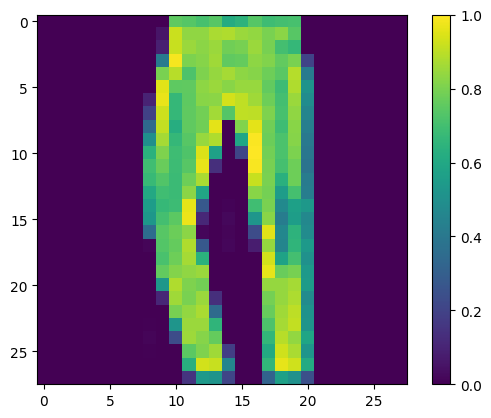

In [79]:
test_labels[5]
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()


In [81]:
print("CASO 1")
prediction1=model1.predict(test_images)
print(prediction1[5])
np.argmax(prediction1[5])

print("CASO 2")
prediction2=model2.predict(test_images)
print(prediction2[5])
np.argmax(prediction2[5])

print("CASO 3")
prediction3=model3.predict(test_images)
print(prediction3[5])
np.argmax(prediction3[5])

print("CASO 4")
prediction4=model4.predict(test_images)
print(prediction4[5])
np.argmax(prediction4[5])

print("CASO 5")
prediction5=model5.predict(test_images)
print(prediction5[5])
np.argmax(prediction5[5])

print("CASO 6")
prediction6=model6.predict(test_images)
print(prediction6[5])
np.argmax(prediction6[5])

print("CASO 7")
prediction7=model7.predict(test_images)
print(prediction7[5])
np.argmax(prediction7[5])

print("CASO 8")
prediction8=model8.predict(test_images)
print(prediction8[5])
np.argmax(prediction8[5])

CASO 1
313/313 [==============================] - 1s 3ms/step
[0.01 0.98 0.   0.   0.01 0.   0.   0.   0.   0.  ]
CASO 2
313/313 [==============================] - 1s 2ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
CASO 3
313/313 [==============================] - 1s 1ms/step
[0.04 0.87 0.   0.06 0.01 0.01 0.01 0.   0.   0.  ]
CASO 4
313/313 [==============================] - 1s 2ms/step
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
CASO 5
313/313 [==============================] - 1s 4ms/step
[0.01 0.97 0.   0.   0.02 0.   0.   0.   0.   0.  ]
CASO 6
313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
CASO 7
313/313 [==============================] - 1s 2ms/step
[0.05 0.07 0.22 0.05 0.02 0.18 0.03 0.07 0.25 0.04]
CASO 8
313/313 [==============================] - 1s 2ms/step
[0.17 0.06 0.04 0.05 0.17 0.08 0.11 0.11 0.15 0.05]


0

In [89]:
print("PREDICCIONES: ",prediction1[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction1[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction1[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction1)

PREDICCIONES:  [0.01 0.98 0.   0.   0.01 0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
0.9999999
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.24 0.   0.64]
 [0.   0.   0.91 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.03 0.   0.   ... 0.   0.88 0.  ]
 [0.   0.99 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.12 0.02 0.01]]


In [90]:
print("PREDICCIONES: ",prediction2[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction2[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction2[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction2)

PREDICCIONES:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.1  0.   0.79]
 [0.   0.   0.95 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.01 0.   0.   ... 0.   0.89 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.04 0.   0.  ]]


In [91]:
print("PREDICCIONES: ",prediction3[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction3[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction3[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction3)

PREDICCIONES:  [0.04 0.87 0.   0.06 0.01 0.01 0.01 0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.01 0.01 ... 0.18 0.03 0.49]
 [0.01 0.   0.56 ... 0.   0.03 0.03]
 [0.01 0.93 0.   ... 0.   0.   0.  ]
 ...
 [0.09 0.01 0.04 ... 0.01 0.38 0.03]
 [0.01 0.83 0.   ... 0.   0.   0.01]
 [0.   0.01 0.01 ... 0.4  0.06 0.12]]


In [92]:
print("PREDICCIONES: ",prediction4[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction4[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction4[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction4)

PREDICCIONES:  [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.15 0.   0.63]
 [0.   0.01 0.93 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.01 0.   0.   ... 0.   0.89 0.  ]
 [0.   0.99 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.03 0.05 0.  ]]


In [93]:
print("PREDICCIONES: ",prediction5[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction5[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction5[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction5)

PREDICCIONES:  [0.01 0.97 0.   0.   0.02 0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.15 0.   0.75]
 [0.   0.   0.89 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.03 0.   0.   ... 0.   0.86 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.17 0.02 0.02]]


In [94]:
print("PREDICCIONES: ",prediction6[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction6[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction6[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction6)

PREDICCIONES:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.01 0.   0.99]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.01 0.   0.  ]]


In [95]:
print("PREDICCIONES: ",prediction7[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction7[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction7[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction7)

PREDICCIONES:  [0.05 0.07 0.22 0.05 0.02 0.18 0.03 0.07 0.25 0.04]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
8
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.07 0.07 0.22 ... 0.09 0.22 0.04]
 [0.06 0.06 0.24 ... 0.07 0.26 0.04]
 [0.05 0.07 0.24 ... 0.08 0.24 0.05]
 ...
 [0.07 0.07 0.21 ... 0.07 0.23 0.04]
 [0.06 0.08 0.26 ... 0.09 0.2  0.04]
 [0.07 0.07 0.22 ... 0.08 0.22 0.04]]


In [96]:
print("PREDICCIONES: ",prediction8[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============")
print(np.argmax(prediction8[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(prediction8[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(prediction8)

PREDICCIONES:  [0.17 0.06 0.04 0.05 0.17 0.08 0.11 0.11 0.15 0.05]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES = 1)============
0
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.12 0.07 0.04 ... 0.11 0.16 0.07]
 [0.12 0.07 0.04 ... 0.12 0.14 0.06]
 [0.17 0.06 0.04 ... 0.12 0.15 0.06]
 ...
 [0.13 0.07 0.04 ... 0.14 0.12 0.06]
 [0.13 0.07 0.04 ... 0.11 0.15 0.06]
 [0.12 0.08 0.04 ... 0.11 0.16 0.07]]


313/313 [==============================] - 1s 3ms/step


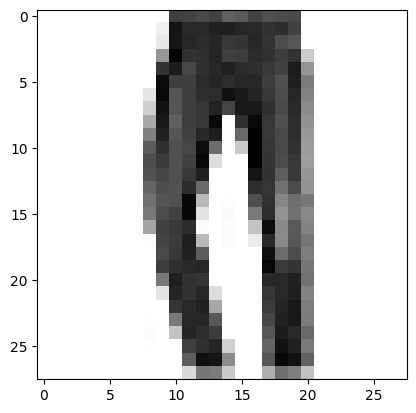

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[9 2 1 ... 8 1 5]
=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
313/313 [==============================] - 0s 1ms/step
PREDICCIONES:  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.74 0.71 0.74 0.62 0.65 0.74 0.69 0.7  0.71 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.92 0.84 0.84 0.87 0.88 0.85 0.84 0.8  0.83 0.74 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.92 0.85 0.83 0.85 0.78 0.8  0.85 0.8  0.7  0.67 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.41 0.99 0.8  0.82 0.86 0.76 0.76 0.83 0.81 0.76 0.8  0.2  0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.8  0.89 

In [47]:
Y_pred = network.predict(test_images)
test_labels = to_categorical(test_labels)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(test_labels, axis = 1)

# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_labels)
print("=======================================================================")
test_labels = to_categorical(test_labels)
print("=VEMOS LAS ETIQUETAS DE TEST AL PASARLAS POR to_categorical============")
print(test_labels)
print("=======================================================================")

# Hacemos las predicciones con las imágenes de Test
predictions = network.predict(test_images)
print("PREDICCIONES: ",predictions[5])
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 5 (QUE DEBERÍAN SER UNOS PANTALONES)============")
print(np.argmax(predictions[5]))
print("=======================================================================")
print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 5 DEBERÍA SER 1 ===")
print(np.sum(predictions[5]))
print("=======================================================================")
print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
print(predictions)

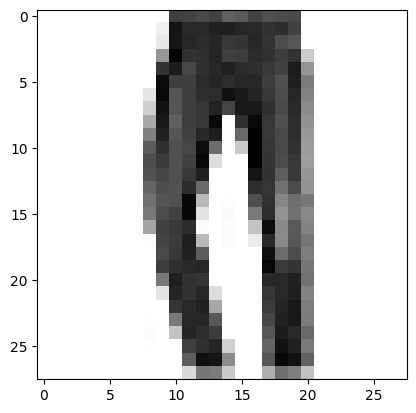

313/313 [==============================] - 1s 2ms/step
Predicciones del modelo 1:
Etiqueta real: 1
Predicciones: 296
Suma de probabilidades: 197.09412

313/313 [==============================] - 1s 3ms/step
Predicciones del modelo 2:
Etiqueta real: 1
Predicciones: 296
Suma de probabilidades: 197.09412

313/313 [==============================] - 0s 1ms/step
Predicciones del modelo 3:
Etiqueta real: 1
Predicciones: 296
Suma de probabilidades: 197.09412

313/313 [==============================] - 0s 1ms/step
Predicciones del modelo 4:
Etiqueta real: 1
Predicciones: 296
Suma de probabilidades: 197.09412

313/313 [==============================] - 0s 1ms/step
Predicciones del modelo 5:
Etiqueta real: 1
Predicciones: 296
Suma de probabilidades: 197.09412

313/313 [==============================] - 0s 1ms/step
Predicciones del modelo 6:
Etiqueta real: 1
Predicciones: 296
Suma de probabilidades: 197.09412

313/313 [==============================] - 0s 1ms/step
Predicciones del modelo 7:
Etique

In [45]:
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos de Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convertir las etiquetas de prueba a one-hot encoding
test_labels = to_categorical(test_labels)

# Elemento a visualizar
element_to_visualize = 5  # Cambia el índice si quieres ver otro elemento

# Visualizar el elemento 6 de test
digit = test_images[element_to_visualize]
# Restaurar la forma original de la imagen (28x28)
digit = digit.reshape(28, 28)

# Visualizar el elemento 6 de test
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


# Hacer predicciones con cada modelo
for i, model in enumerate(modelos):
    modelou = modelos[i]

    # Asegúrate de que los datos de prueba tengan la forma correcta
    test_images_reshaped = test_images.reshape(test_images.shape[0], 28, 28)

    predictions = modelou.predict(test_images_reshaped)

    print(f"Predicciones del modelo {i + 1}:")
    print("Etiqueta real:", np.argmax(test_labels[element_to_visualize]))
    print("Predicciones:", np.argmax(predictions[element_to_visualize]))
    print("Suma de probabilidades:", np.sum(predictions[element_to_visualize]))
    print()


In [102]:
c = 8
predictions = []
p = [prediction1,prediction2,prediction3,prediction4,prediction5,prediction6,prediction7,prediction8]
for c in range(c):
  predictions.append(p)

####**6._** Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para uno de los 8 casos
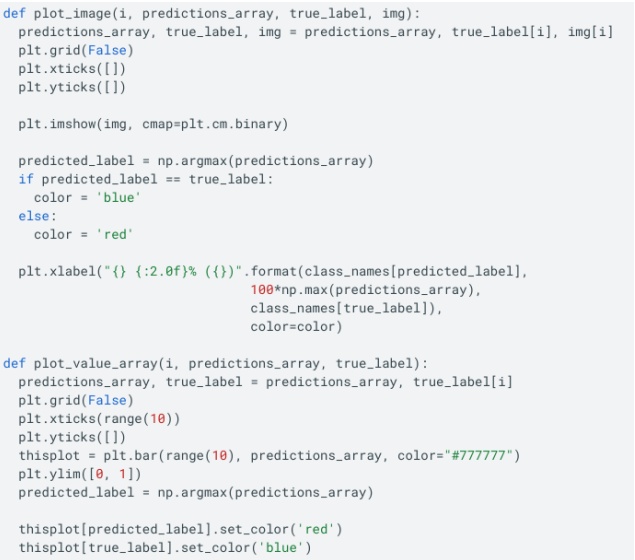

####Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.
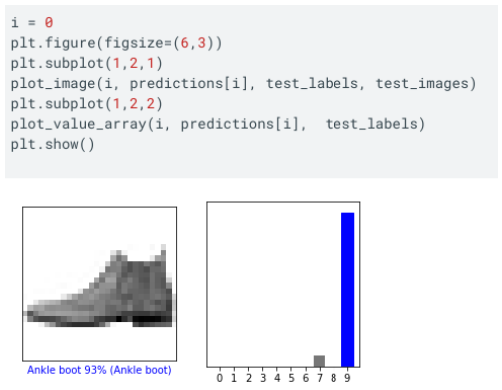

####Utilícelo para ver la predicción, igual que el gráfico anterior, de las 10 primeras imágenes del conjunto de test, para cada uno de los 8 casos. Reflexione y comente las diferencias que observa.

In [121]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)

  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres[predicted_label],
                                100*np.max(predictions_array),
                                nombres[true_label]),
                                color=color)





def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  5


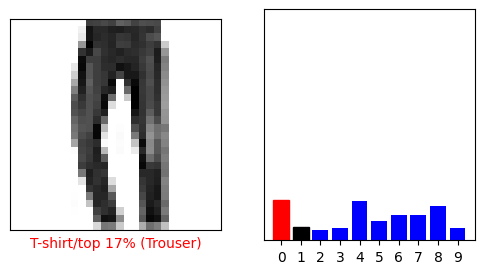

----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  5


<Figure size 640x480 with 0 Axes>

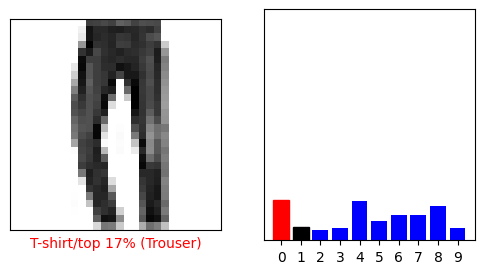

----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  5


<Figure size 640x480 with 0 Axes>

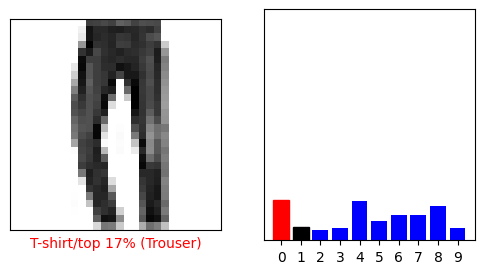

----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  5


<Figure size 640x480 with 0 Axes>

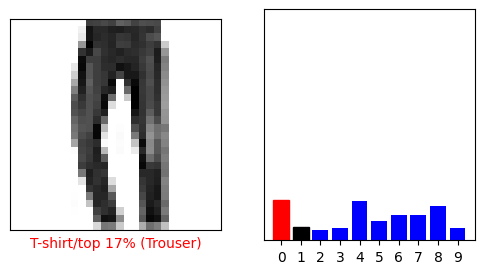

----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  5


<Figure size 640x480 with 0 Axes>

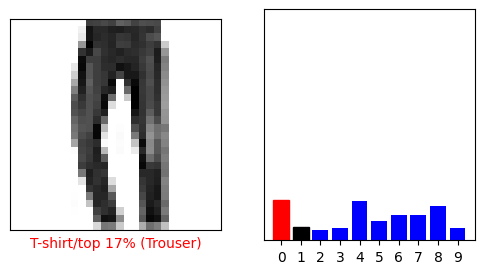

----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  5


<Figure size 640x480 with 0 Axes>

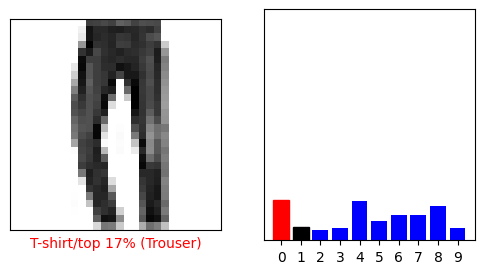

----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  5


<Figure size 640x480 with 0 Axes>

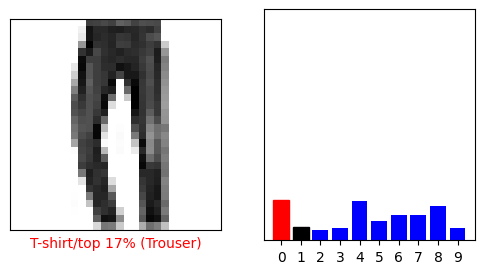

<Figure size 640x480 with 0 Axes>

In [122]:
for caso in range(c):
  print("----------------------------------------------------------")
  print("PREDICCIONES CASO ", caso + 1 , " FIGURA ", 5)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, p[c][5], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(5, p[c][5],  test_labels)
  plt.show()
  plt.clf()

TypeError: ignored

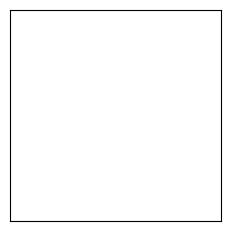

In [110]:
i = 0
plt.figure(figsize= (6,3))
plt.subplot (1,2, 1)
plot_image (i, p[c][i], test_labels, test_images)
plt.subplot (1,2,2)
plot_value_array(i, predictions[1], test_labels)
plt.show()

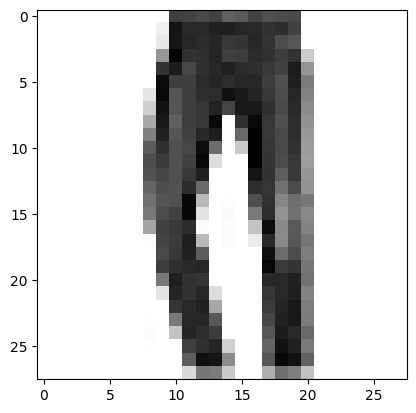

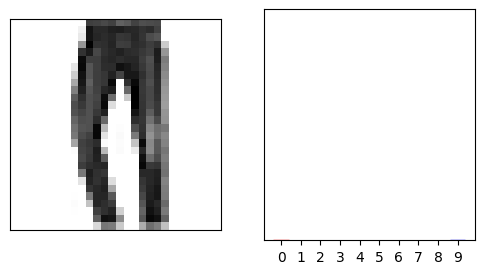

In [98]:
# Veamos el elemento 5 de test y pintémoslo con matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

def plot_image (i, predictions, true_label, img):
  predictions, true_label, img = predictions, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(digit, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions)
  #if predicted_label == true_label.all():
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  #plt.xlabel(" {} {:2.0f}% ({})".format (class_names [predicted_label],
                               # 100*np.max (predictions),
                               # class_names[true_label]),
                               # color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range (10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax (predictions_array)

  thisplot [predicted_label].set_color ('red')
  thisplot [true_label].set_color ('blue')


i = 0
plt.figure(figsize= (6,3))
plt.subplot (1,2, 1)
plot_image (i, predictions, test_labels, test_images)
plt.subplot (1,2,2)
plot_value_array(i, predictions[1], test_labels)
plt.show()

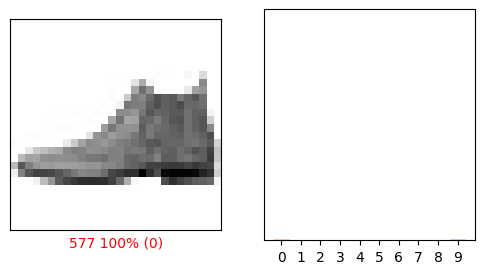

<Figure size 640x480 with 0 Axes>

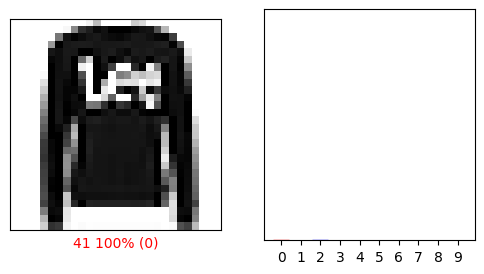

<Figure size 640x480 with 0 Axes>

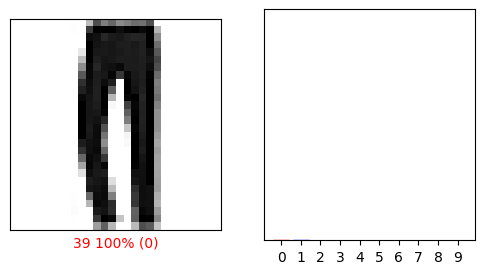

<Figure size 640x480 with 0 Axes>

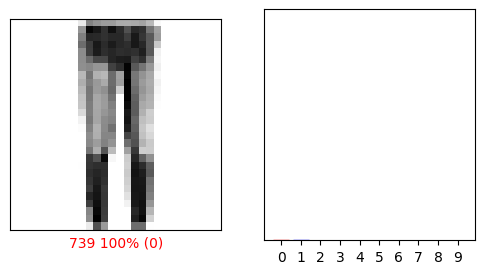

<Figure size 640x480 with 0 Axes>

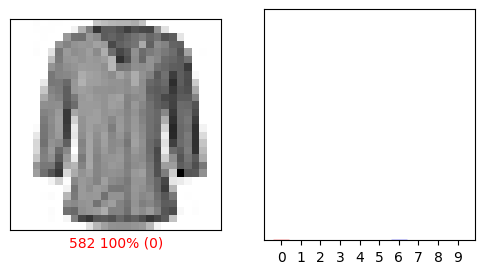

<Figure size 640x480 with 0 Axes>

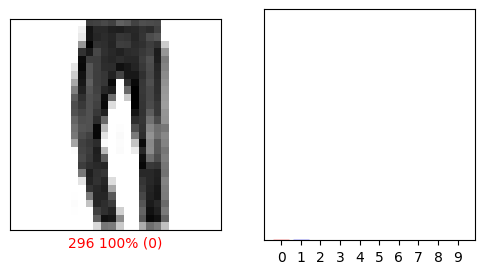

<Figure size 640x480 with 0 Axes>

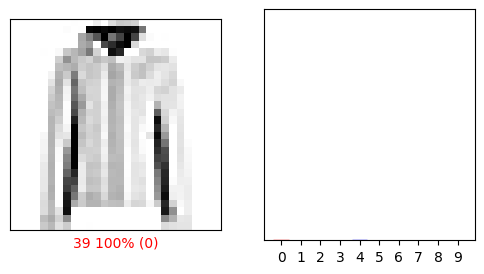

<Figure size 640x480 with 0 Axes>

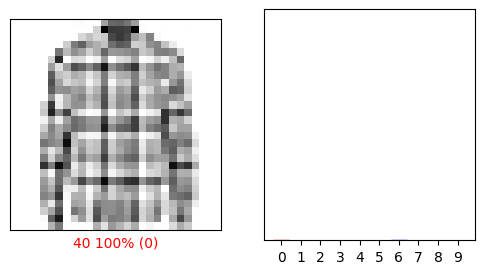

<Figure size 640x480 with 0 Axes>

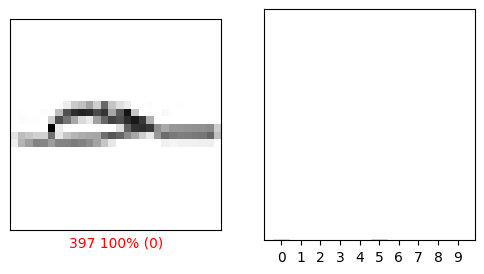

<Figure size 640x480 with 0 Axes>

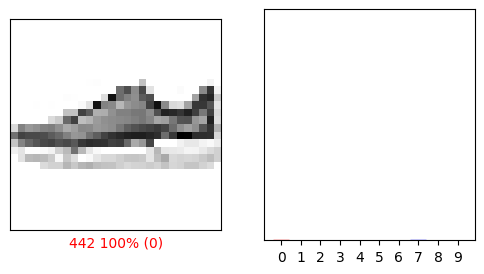

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_labels[i])

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color.strip())

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

for i in range(10):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], test_labels, test_images.reshape(10000, 28, 28))
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[1], test_labels)
    plt.show()
    plt.clf()

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range (10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax (predictions_array)

  thisplot [predicted_label].set_color ('red')
  thisplot [true_label].set_color ('blue')

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


predictions1 = network1.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)


####**7._** Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por 'adam' y la función de pérdida 'sparse_categorical_crossentropy'. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado

**Optimizador Adam:**

Adam, que significa Adaptive Moment Estimation, es un algoritmo de optimización popular utilizado en el entrenamiento de redes neuronales. Combina las ideas de los optimizadores RMSprop y Momentum. La esencia detrás de Adam es mantener dos momentos para cada parámetro: el primer momento (media móvil) que almacena el promedio de los gradientes pasados y el segundo momento (varianza móvil) que almacena el promedio de los cuadrados de los gradientes pasados. Estos momentos se utilizan para adaptar las tasas de aprendizaje de cada parámetro individualmente, lo que permite un entrenamiento más rápido y eficiente de la red neuronal.

**Función de pérdida 'sparse_categorical_crossentropy':**

La función de pérdida 'sparse_categorical_crossentropy' se utiliza comúnmente en problemas de clasificación cuando las etiquetas de destino son números enteros y no necesitan codificación one-hot (es decir, las etiquetas no se representan como vectores binarios, sino como enteros). Esta función calcula la pérdida entre las etiquetas verdaderas y las predicciones del modelo. Especifica cuán lejos están las predicciones del modelo de las etiquetas reales. La salida de esta función es un número real que representa la pérdida acumulada en todas las muestras.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

# Cargar los datos de Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocesar los datos
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Crear el modelo y compilarlo
def train_model(neurons, activation, optimizer, epochs):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    return history

configs = [
    (10, 'sigmoid', Adam(learning_rate=0.001), 5),  # Modelo 3
]

# Entrenar y evaluar los modelos
for i, caso in enumerate(configs):
    neurons, activation, optimizer, epochs = caso
    print("Entrenando Modelo {} - Neuronas en Capa 1: {}, Función de Activación: {}, Optimizador: Adam".format(i + 1, neurons, activation))
    history = train_model(neurons, activation, optimizer, epochs)
    print("Resultado en épocas de entrenamiento:")
    print("Época final - Precisión de entrenamiento: {},".format(history.history['accuracy'][-1]), "Precisión de prueba: {}".format(history.history['val_accuracy'][-1]))



